## Truc huynh

### Material:
- [Filter in Python Columns](https://python.plainenglish.io/filtering-rows-and-columns-in-pandas-python-techniques-you-must-know-6cdfc32c614c)
- [Drop multiple columns](https://pythonexamples.org/pandas-dataframe-delete-column/#5)

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import json

## Exploratory Data Analysis (EDA)

1. Decide if feature selection is needed.
    * Do you have hihgly correlated features?
2. Decide if you have non-scalar attributes.
3. What type of supervised learning is this?
    * Binary Classification
    * Multi-class classification?
    * Ordinal classification [Tricky]
        * Do you want to change this into regression or binarize into binary classification?
    * Regression
4. If doing classification
    1. Decide whether you class variable makes sense.
    2. Figure out what your class balance is
5. Histogram the features
    * Good if distribution is highly skewed
6. Vizualize using reduced dimensions
    * PCA, MVD
    * T-SNE

In [5]:
df = pd.read_csv("./data.csv")

In [33]:
df.shape

2845342

In [7]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,Between Sawmill Rd/Exit 20 and OH-315/Olentang...,...,False,False,False,False,False,False,Night,Night,Night,Night
1,A-2,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,39.865010,-84.048730,0.747,At OH-4/OH-235/Exit 41 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Night
2,A-3,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,39.102090,-84.523960,0.055,At I-71/US-50/Exit 1 - Accident.,...,False,False,False,False,False,False,Night,Night,Night,Day
3,A-4,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,41.062170,-81.535470,0.123,At Dart Ave/Exit 21 - Accident.,...,False,False,False,False,False,False,Night,Night,Day,Day
4,A-5,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,At Mitchell Ave/Exit 6 - Accident.,...,False,False,False,False,False,False,Day,Day,Day,Day


In [8]:
df.describe()

,Severity,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Number,Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in)
count,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,2.845342e+06,1.101431e+06,2.776068e+06,2.375699e+06,2.772250e+06,2.786142e+06,2.774796e+06,2.687398e+06,2.295884e+06
mean,2.137572e+00,3.624520e+01,-9.711463e+01,3.624532e+01,-9.711439e+01,7.026779e-01,8.089408e+03,6.179356e+01,5.965823e+01,6.436545e+01,2.947234e+01,9.099391e+00,7.395044e+00,7.016940e-03
std,4.787216e-01,5.363797e+00,1.831782e+01,5.363873e+00,1.831763e+01,1.560361e+00,1.836009e+04,1.862263e+01,2.116097e+01,2.287457e+01,1.045286e+00,2.717546e+00,5.527454e+00,9.348831e-02
min,1.000000e+00,2.456603e+01,-1.245481e+02,2.456601e+01,-1.245457e+02,0.000000e+00,0.000000e+00,-8.900000e+01,-8.900000e+01,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.000000e+00,3.344517e+01,-1.180331e+02,3.344628e+01,-1.180333e+02,5.200000e-02,1.270000e+03,5.000000e+01,4.600000e+01,4.800000e+01,2.931000e+01,1.000000e+01,3.500000e+00,0.000000e+00
50%,2.000000e+00,3.609861e+01,-9.241808e+01,3.609799e+01,-9.241772e+01,2.440000e-01,4.007000e+03,6.400000e+01,6.300000e+01,6.700000e+01,2.982000e+01,1.000000e+01,7.000000e+00,0.000000e+00
75%,2.000000e+00,4.016024e+01,-8.037243e+01,4.016105e+01,-8.037338e+01,7.640000e-01,9.567000e+03,7.600000e+01,7.600000e+01,8.300000e+01,3.001000e+01,1.000000e+01,1.000000e+01,0.000000e+00
max,4.000000e+00,4.900058e+01,-6.711317e+01,4.907500e+01,-6.710924e+01,1.551860e+02,9.999997e+06,1.960000e+02,1.960000e+02,1.000000e+02,5.890000e+01,1.400000e+02,1.087000e+03,2.400000e+01


## Check Missing values

<AxesSubplot:>

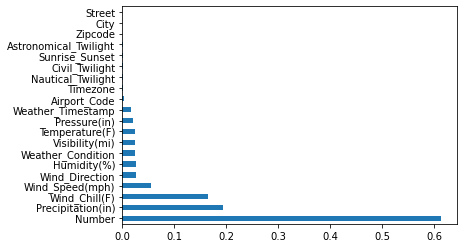

In [9]:
# Check out the missing values in percentage
missing_percentage = df.isna().sum().sort_values(ascending=False)/len(df)

missing_percentage[missing_percentage!=0].plot(kind='barh')


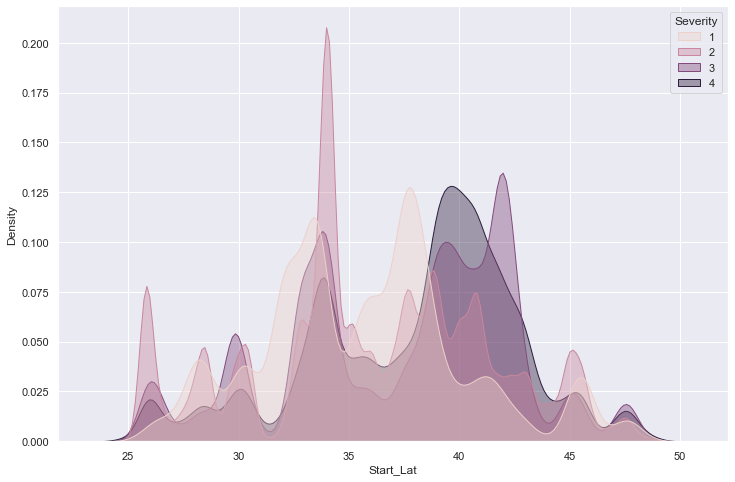

In [27]:
# Set figure size
plt.rcParams["figure.figsize"]=12,8

sns.set(style='darkgrid')

# stacked density plot
sns.kdeplot(data=df, x="Start_Lat", hue="Severity", fill=True, common_norm=False, alpha=0.4)
plt.show()

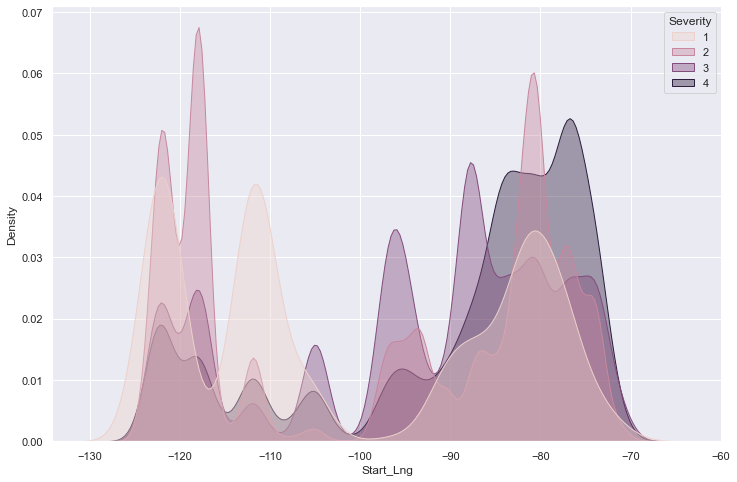

In [26]:
sns.set(style='darkgrid')

# stacked density plot
sns.kdeplot(data=df, x="Start_Lng", hue="Severity", fill=True, common_norm=False, alpha=0.4)
plt.show()

Check the number of accident start and end at the same place

In [31]:
sum(df['Start_Lat'] == df['End_Lat'])

399869

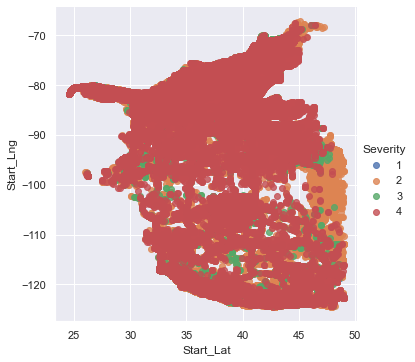

In [42]:
sns.lmplot(data=df, x='Start_Lat', y='Start_Lng', hue='Severity', fit_reg=False)
plt.show()

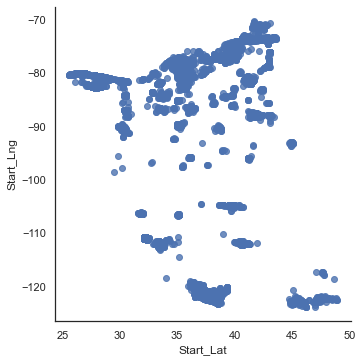

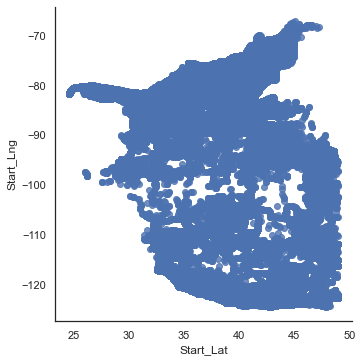

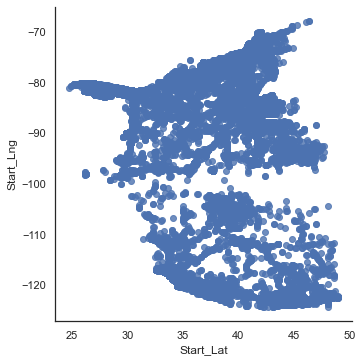

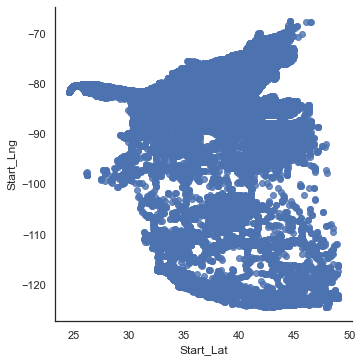

In [69]:
sns.lmplot(data=df[(df['Severity']==1)], x='Start_Lat', y='Start_Lng', fit_reg=False, legend=True)
sns.lmplot(data=df[(df['Severity']==2)], x='Start_Lat', y='Start_Lng', fit_reg=False, legend=True)
sns.lmplot(data=df[(df['Severity']==3)], x='Start_Lat', y='Start_Lng', fit_reg=False, legend=True)
sns.lmplot(data=df[(df['Severity']==4)], x='Start_Lat', y='Start_Lng', fit_reg=False, legend=True)
plt.show()

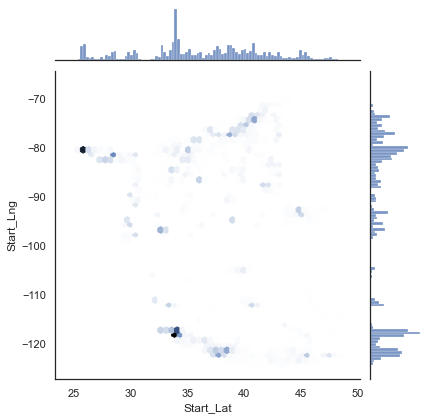

In [63]:
sns.set(style="white", color_codes=True)
sns.jointplot( x='Start_Lat', y='Start_Lng', data=df, kind='hex', marginal_kws=dict(bins=100, fill=True))

## Drop unecessary column
Drop some columns that is not useful

In [71]:
df = df.drop(['ID', 'Description', 'Number', 'Distance(mi)', 'End_Lat', 'End_Lng','Country','Amenity',
       'Bump','Give_Way','No_Exit','Roundabout','Traffic_Calming','Turning_Loop'], axis=1)

In [17]:
# Check for column name
# See in Kaggle.com and quick analyst some column that will not be useful such as
# ID: no need
# 
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight'],
      dtype='object')

In [73]:
df.shape

(2845342, 33)

In [74]:
df.head()

,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,Street,Side,City,County,State,...,Crossing,Junction,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,Outerbelt E,R,Dublin,Franklin,OH,...,False,False,False,False,False,False,Night,Night,Night,Night
1,2,2016-02-08 05:56:20,2016-02-08 11:56:20,39.865420,-84.062800,I-70 E,R,Dayton,Montgomery,OH,...,False,False,False,False,False,False,Night,Night,Night,Night
2,2,2016-02-08 06:15:39,2016-02-08 12:15:39,39.102660,-84.524680,I-75 S,R,Cincinnati,Hamilton,OH,...,False,True,False,False,False,False,Night,Night,Night,Day
3,2,2016-02-08 06:51:45,2016-02-08 12:51:45,41.062130,-81.537840,I-77 N,R,Akron,Summit,OH,...,False,False,False,False,False,False,Night,Night,Day,Day
4,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,I-75 S,R,Cincinnati,Hamilton,OH,...,False,False,False,False,False,False,Day,Day,Day,Day


## Preprocessing

1. Remove meaningless features (e.g. IDs), or unfair features (e.g. percent grade should be removed if predicing final grade)
2. Discretization
3. Transform features into usable formats (standardize dates, vectorize words)
4. Transform data to a wide format (one row per prediction)
5. **Feature Selection**: Remove redundant, noisy features or unhelpful features
6. Feature creation
    * Use an external tool (e.g. analyzing sentiment from text)
7. Revist EDA using processed features